<a href="https://colab.research.google.com/github/Shahi77/DeepLearning_Assignments/blob/main/Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shahi

21DCS025

Assignment - 02 (CS-661)

MNIST

Using device: cpu

Training LeNet on MNIST with Sigmoid activation
Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.1MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 28.9k/28.9k [00:00<00:00, 503kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.65MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [Errno 111] Connection refused>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.95MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/15], Loss: 0.8428, Accuracy: 74.36%
Epoch [2/15], Loss: 0.1457, Accuracy: 95.87%
Epoch [3/15], Loss: 0.0983, Accuracy: 97.04%
Epoch [4/15], Loss: 0.0792, Accuracy: 97.59%
Epoch [5/15], Loss: 0.0671, Accuracy: 97.97%
Epoch [6/15], Loss: 0.0586, Accuracy: 98.23%
Epoch [7/15], Loss: 0.0526, Accuracy: 98.42%
Epoch [8/15], Loss: 0.0468, Accuracy: 98.55%
Epoch [9/15], Loss: 0.0432, Accuracy: 98.67%
Epoch [10/15], Loss: 0.0385, Accuracy: 98.82%
Epoch [11/15], Loss: 0.0364, Accuracy: 98.84%
Epoch [12/15], Loss: 0.0328, Accuracy: 99.01%
Epoch [13/15], Loss: 0.0301, Accuracy: 99.09%
Epoch [14/15], Loss: 0.0279, Accuracy: 99.14%
Epoch [15/15], Loss: 0.0253, Accuracy: 99.17%

Training LeNet on MNIST with Bipolar Sigmoid activation
Epoch [1/15], Loss: 0.3429, Accuracy: 89.60%
Epoch [2/15], Loss: 0.0893, Accuracy: 97.24%
Epoch [3/15], Loss: 0.0608, Accuracy: 98.10%
Epoch [4/15], Loss: 0.0481, Accuracy: 98.56%
Epoch [

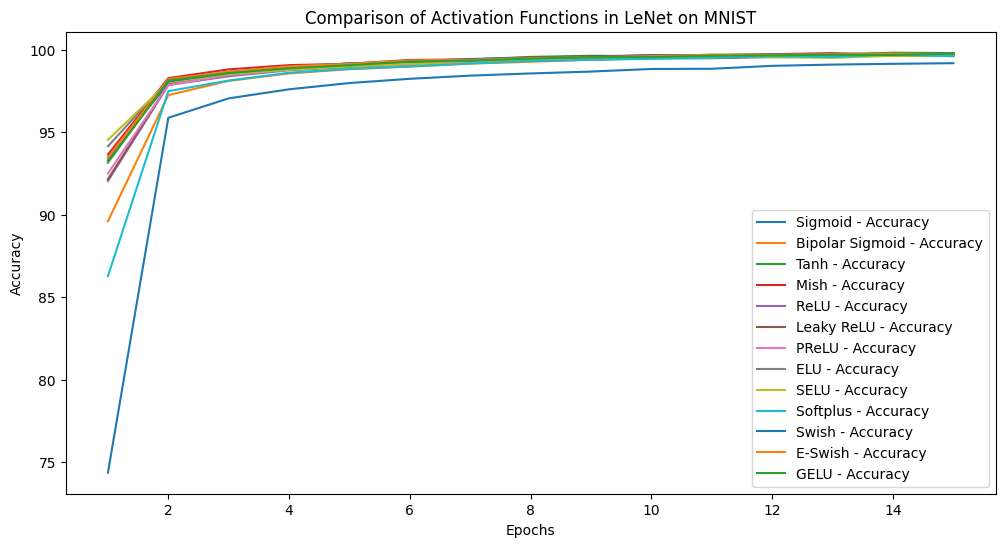


Training ResNet on MNIST with Sigmoid activation


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch [1/15], Loss: 0.1357, Accuracy: 95.95%
Epoch [2/15], Loss: 0.0625, Accuracy: 98.16%
Epoch [3/15], Loss: 0.0447, Accuracy: 98.76%
Epoch [4/15], Loss: 0.0372, Accuracy: 98.89%
Epoch [5/15], Loss: 0.0328, Accuracy: 99.04%
Epoch [6/15], Loss: 0.0311, Accuracy: 99.06%
Epoch [7/15], Loss: 0.0276, Accuracy: 99.18%
Epoch [8/15], Loss: 0.0223, Accuracy: 99.35%
Epoch [9/15], Loss: 0.0209, Accuracy: 99.36%
Epoch [10/15], Loss: 0.0184, Accuracy: 99.46%
Epoch [11/15], Loss: 0.0155, Accuracy: 99.55%
Epoch [12/15], Loss: 0.0168, Accuracy: 99.52%
Epoch [13/15], Loss: 0.0119, Accuracy: 99.65%
Epoch [14/15], Loss: 0.0140, Accuracy: 99.57%
Epoch [15/15], Loss: 0.0160, Accuracy: 99.56%

Training ResNet on MNIST with Bipolar Sigmoid activation
Epoch [1/15], Loss: 0.1330, Accuracy: 95.95%
Epoch [2/15], Loss: 0.0599, Accuracy: 98.20%
Epoch [3/15], Loss: 0.0477, Accuracy: 98.61%
Epoch [4/15], Loss: 0.0371, Accuracy: 98.88%
Epoch [5/15], Loss: 0.0336, Accuracy: 99.02%
Epoch [6/15], Loss: 0.0289, Accuracy

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


class BipolarSigmoid(nn.Module):
    def forward(self, x):
        return 2 / (1 + torch.exp(-x)) - 1

activations = {
    "Sigmoid": nn.Sigmoid(),
    "Bipolar Sigmoid": BipolarSigmoid(),
    "Tanh": nn.Tanh(),
    "Mish": nn.Mish(),
    "ReLU": nn.ReLU(),
    "Leaky ReLU": nn.LeakyReLU(0.01),
    "PReLU": nn.PReLU(),
    "ELU": nn.ELU(),
    "SELU": nn.SELU(),
    "Softplus": nn.Softplus(),
    "Swish": lambda x: x * torch.sigmoid(x),
    "E-Swish": lambda x: 1.25 * x * torch.sigmoid(x),
    "GELU": nn.GELU()
}


def load_data(dataset_name, batch_size=64):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    if dataset_name == "MNIST":
        dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "Fashion-MNIST":
        dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "CIFAR-10":
        dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "CIFAR-100":
        dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
    else:
        raise ValueError("Invalid dataset name!")
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)


def get_model(architecture, num_classes=10, activation_fn="ReLU"):
    activation = activations[activation_fn]

    if architecture == "LeNet":
        model = LeNet(num_classes=num_classes, activation_fn=activation_fn)
    elif architecture == "ResNet":
        model = models.resnet18(pretrained=False)
        model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)  # Change input channel to 1
        model.fc = nn.Linear(model.fc.in_features, num_classes)  # Adjust output layer
        model = model.to(device)
    elif architecture == "MobileNet":
        model = models.mobilenet_v2(pretrained=False)
        model.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)  # Change input channel to 1
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)  # Adjust output layer
        model = model.to(device)
    else:
        raise ValueError("Invalid architecture!")

    return model

# Define LeNet Model with Correct Flattening
class LeNet(nn.Module):
    def __init__(self, num_classes=10, activation_fn="ReLU"):
        super(LeNet, self).__init__()
        self.activation = activations[activation_fn]
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)  # 1 input channel (grayscale)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)

        # Calculate the size after convolution and pooling
        self._to_linear = None
        self.convs_output_size(28, 28)  # 28x28 is the input size for MNIST/Fashion-MNIST

        self.fc1 = nn.Linear(self._to_linear, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def convs_output_size(self, h, w):
        # Forward pass through convolutional layers to calculate output size
        x = torch.randn(1, 1, h, w)  # Dummy input with 1 channel (grayscale)
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        # Flatten and calculate the total number of features
        self._to_linear = x.numel()

    def forward(self, x):
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten the output of convolutional layers
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Training Function with Performance Tracking
def train_model(model, train_loader, epochs, learning_rate=0.001):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    accuracies = []

    for epoch in range(epochs):
        model.train()
        correct = 0
        total = 0
        epoch_loss = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        losses.append(epoch_loss / len(train_loader))
        accuracies.append(100 * correct / total)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

    return losses, accuracies

# Experiment with Architectures
def experiment(architecture, dataset_name, activation_fn, num_classes=10, batch_size=64, epochs=15):
    print(f"\nTraining {architecture} on {dataset_name} with {activation_fn} activation")
    train_loader = load_data(dataset_name, batch_size)

    model = get_model(architecture, num_classes=num_classes, activation_fn=activation_fn)
    losses, accuracies = train_model(model, train_loader, epochs)

    return losses, accuracies

# Plot the results
def plot_results(results, architecture, dataset_name):
    plt.figure(figsize=(12, 6))
    for activation_fn, (losses, accuracies) in results.items():
        plt.plot(range(1, len(losses)+1), accuracies, label=f"{activation_fn} - Accuracy")
    plt.title(f"Comparison of Activation Functions in {architecture} on {dataset_name}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Run Experiments and Plot Results
architectures = ["LeNet", "ResNet"]
datasets_list = ["MNIST"]
activations_list = list(activations.keys())  # Use first 3 for brevity, expand as needed

for dataset_name in datasets_list:
    for architecture in architectures:
        results = {}
        for activation_fn in activations_list:
            losses, accuracies = experiment(architecture, dataset_name, activation_fn)
            results[activation_fn] = (losses, accuracies)
        plot_results(results, architecture, dataset_name)

Using device: cpu

Training ResNet on MNIST with ReLU activation
Epoch [1/5], Loss: 1.3691, Accuracy: 55.35%
Epoch [2/5], Loss: 1.0019, Accuracy: 67.21%
Epoch [3/5], Loss: 0.9349, Accuracy: 69.28%
Epoch [4/5], Loss: 0.9104, Accuracy: 70.01%
Epoch [5/5], Loss: 0.8889, Accuracy: 70.54%

Training ResNet on MNIST with GELU activation
Epoch [1/5], Loss: 1.3754, Accuracy: 54.72%
Epoch [2/5], Loss: 1.0231, Accuracy: 67.19%
Epoch [3/5], Loss: 0.9496, Accuracy: 68.82%
Epoch [4/5], Loss: 0.9053, Accuracy: 70.28%
Epoch [5/5], Loss: 0.9002, Accuracy: 70.94%

Training ResNet on MNIST with Mish activation
Epoch [1/5], Loss: 1.3934, Accuracy: 54.22%
Epoch [2/5], Loss: 1.0259, Accuracy: 66.50%
Epoch [3/5], Loss: 0.9580, Accuracy: 69.32%
Epoch [4/5], Loss: 0.9073, Accuracy: 70.37%
Epoch [5/5], Loss: 0.8755, Accuracy: 71.33%


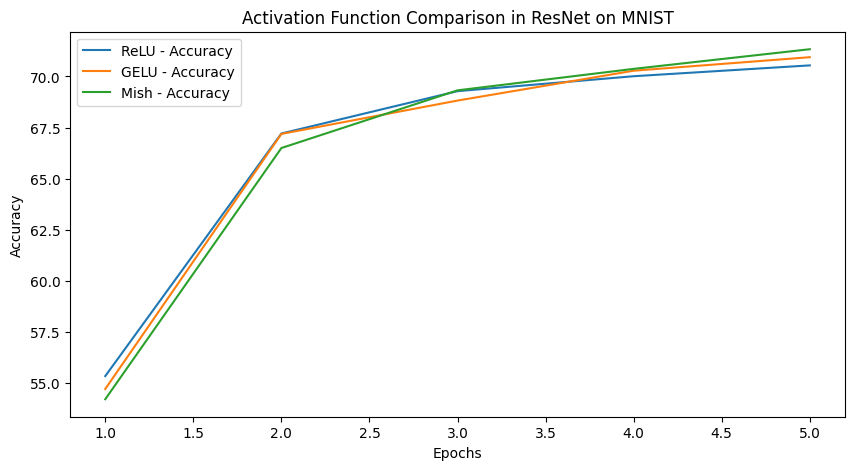


Training MobileNet on MNIST with ReLU activation


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 99.2MB/s]


Epoch [1/5], Loss: 1.3923, Accuracy: 53.49%
Epoch [2/5], Loss: 1.1300, Accuracy: 62.62%
Epoch [3/5], Loss: 1.1130, Accuracy: 63.85%
Epoch [4/5], Loss: 1.0706, Accuracy: 65.26%
Epoch [5/5], Loss: 1.0558, Accuracy: 65.70%

Training MobileNet on MNIST with GELU activation
Epoch [1/5], Loss: 1.3926, Accuracy: 53.76%
Epoch [2/5], Loss: 1.1472, Accuracy: 63.09%
Epoch [3/5], Loss: 1.1099, Accuracy: 63.50%
Epoch [4/5], Loss: 1.1088, Accuracy: 63.88%
Epoch [5/5], Loss: 1.0961, Accuracy: 64.17%

Training MobileNet on MNIST with Mish activation
Epoch [1/5], Loss: 1.3807, Accuracy: 54.40%
Epoch [2/5], Loss: 1.1502, Accuracy: 61.72%
Epoch [3/5], Loss: 1.1198, Accuracy: 63.03%
Epoch [4/5], Loss: 1.0882, Accuracy: 64.12%
Epoch [5/5], Loss: 1.0858, Accuracy: 64.75%


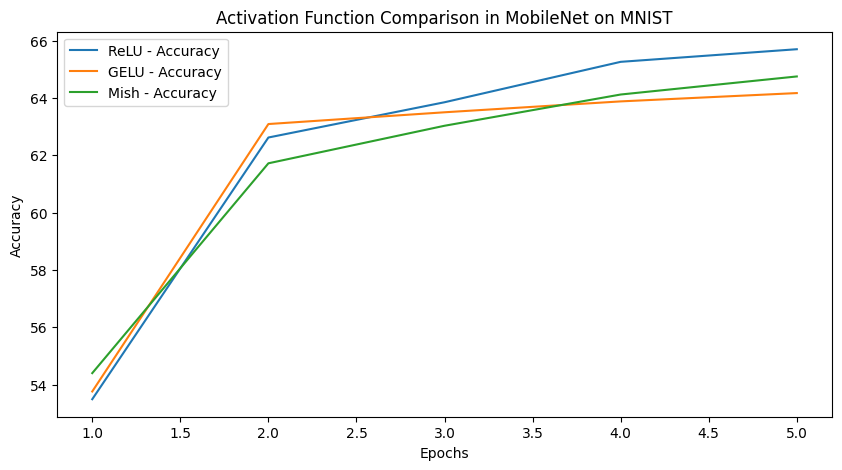

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Custom Bipolar Sigmoid Activation
class BipolarSigmoid(nn.Module):
    def forward(self, x):
        return 2 / (1 + torch.exp(-x)) - 1

# Dictionary of activation functions
activations = {
    "ReLU": nn.ReLU(),
    "Leaky ReLU": nn.LeakyReLU(0.01),
    "PReLU": nn.PReLU(),
    "ELU": nn.ELU(),
    "SELU": nn.SELU(),
    "GELU": nn.GELU(),
    "Mish": nn.Mish(),
    "Swish": lambda x: x * torch.sigmoid(x),
}

# Load and preprocess dataset
def load_data(dataset_name, batch_size=32, subset_size=10000):
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3-channel
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    if dataset_name == "MNIST":
        dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "Fashion-MNIST":
        dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    else:
        raise ValueError("Invalid dataset name!")

    # Reduce dataset size for faster training
    dataset, _ = random_split(dataset, [subset_size, len(dataset) - subset_size])

    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Get pre-trained model
def get_model(architecture, num_classes=10):
    if architecture == "ResNet":
        model = models.resnet18(pretrained=True)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    elif architecture == "MobileNet":
        model = models.mobilenet_v2(pretrained=True)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    else:
        raise ValueError("Invalid architecture!")

    # Freeze all layers except the last layer
    for param in model.parameters():
        param.requires_grad = False
    for param in model.fc.parameters() if architecture == "ResNet" else model.classifier.parameters():
        param.requires_grad = True

    return model.to(device)

# Training function
def train_model(model, train_loader, epochs=5, learning_rate=0.001):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=learning_rate)

    losses, accuracies = [], []

    for epoch in range(epochs):
        model.train()
        correct, total, epoch_loss = 0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        losses.append(epoch_loss / len(train_loader))
        accuracies.append(100 * correct / total)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

    return losses, accuracies

# Experiment function
def experiment(architecture, dataset_name, activation_fn, num_classes=10, batch_size=32, epochs=5):
    print(f"\nTraining {architecture} on {dataset_name} with {activation_fn} activation")
    train_loader = load_data(dataset_name, batch_size)
    model = get_model(architecture, num_classes)
    losses, accuracies = train_model(model, train_loader, epochs)
    return losses, accuracies

# Plot results
def plot_results(results, architecture, dataset_name):
    plt.figure(figsize=(10, 5))
    for activation_fn, (losses, accuracies) in results.items():
        plt.plot(range(1, len(losses)+1), accuracies, label=f"{activation_fn} - Accuracy")
    plt.title(f"Activation Function Comparison in {architecture} on {dataset_name}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Run experiments
architectures = ["ResNet", "MobileNet"]
datasets_list = ["MNIST"]
activations_list = ["ReLU", "GELU", "Mish"]  # Limit activation functions for speed

for dataset_name in datasets_list:
    for architecture in architectures:
        results = {}
        for activation_fn in activations_list:
            losses, accuracies = experiment(architecture, dataset_name, activation_fn)
            results[activation_fn] = (losses, accuracies)
        plot_results(results, architecture, dataset_name)


Fashion-MNIST

Using device: cpu

Training LeNet on Fashion-MNIST with Sigmoid activation


100%|██████████| 26.4M/26.4M [00:03<00:00, 8.50MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 134kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 2.53MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 3.45MB/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch [1/15], Loss: 1.1632, Accuracy: 57.55%
Epoch [2/15], Loss: 0.6719, Accuracy: 74.53%
Epoch [3/15], Loss: 0.5678, Accuracy: 78.09%
Epoch [4/15], Loss: 0.5086, Accuracy: 80.62%
Epoch [5/15], Loss: 0.4682, Accuracy: 82.52%
Epoch [6/15], Loss: 0.4355, Accuracy: 83.76%
Epoch [7/15], Loss: 0.4128, Accuracy: 84.82%
Epoch [8/15], Loss: 0.3932, Accuracy: 85.69%
Epoch [9/15], Loss: 0.3783, Accuracy: 86.21%
Epoch [10/15], Loss: 0.3645, Accuracy: 86.74%
Epoch [11/15], Loss: 0.3536, Accuracy: 87.09%
Epoch [12/15], Loss: 0.3436, Accuracy: 87.44%
Epoch [13/15], Loss: 0.3348, Accuracy: 87.65%
Epoch [14/15], Loss: 0.3274, Accuracy: 88.06%
Epoch [15/15], Loss: 0.3223, Accuracy: 88.14%

Training LeNet on Fashion-MNIST with Bipolar Sigmoid activation
Epoch [1/15], Loss: 0.7037, Accuracy: 73.69%
Epoch [2/15], Loss: 0.4284, Accuracy: 84.40%
Epoch [3/15], Loss: 0.3701, Accuracy: 86.60%
Epoch [4/15], Loss: 0.3395, Ac

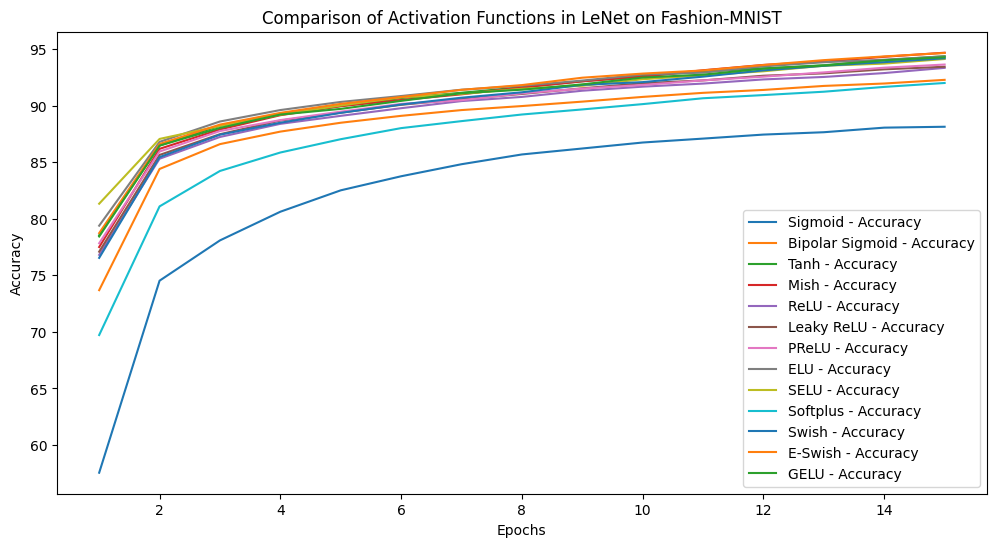

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


class BipolarSigmoid(nn.Module):
    def forward(self, x):
        return 2 / (1 + torch.exp(-x)) - 1

activations = {
    "Sigmoid": nn.Sigmoid(),
    "Bipolar Sigmoid": BipolarSigmoid(),
    "Tanh": nn.Tanh(),
    "Mish": nn.Mish(),
    "ReLU": nn.ReLU(),
    "Leaky ReLU": nn.LeakyReLU(0.01),
    "PReLU": nn.PReLU(),
    "ELU": nn.ELU(),
    "SELU": nn.SELU(),
    "Softplus": nn.Softplus(),
    "Swish": lambda x: x * torch.sigmoid(x),
    "E-Swish": lambda x: 1.25 * x * torch.sigmoid(x),
    "GELU": nn.GELU()
}


def load_data(dataset_name, batch_size=64):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    if dataset_name == "MNIST":
        dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "Fashion-MNIST":
        dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "CIFAR-10":
        dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "CIFAR-100":
        dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
    else:
        raise ValueError("Invalid dataset name!")
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)


def get_model(architecture, num_classes=10, activation_fn="ReLU"):
    activation = activations[activation_fn]

    if architecture == "LeNet":
        model = LeNet(num_classes=num_classes, activation_fn=activation_fn)
    elif architecture == "ResNet":
        model = models.resnet18(pretrained=False)
        model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
        model = model.to(device)
    elif architecture == "MobileNet":
        model = models.mobilenet_v2(pretrained=False)
        model.features[0][0] = nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
        model = model.to(device)
    elif architecture == "AlexNet":
        model = models.alexnet(pretrained=False)
        model.features[0] = nn.Conv2d(1, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)
        model = model.to(device)
    else:
        raise ValueError("Invalid architecture!")

    return model


class LeNet(nn.Module):
    def __init__(self, num_classes=10, activation_fn="ReLU"):
        super(LeNet, self).__init__()
        self.activation = activations[activation_fn]
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self._to_linear = None
        self.convs_output_size(28, 28)

        self.fc1 = nn.Linear(self._to_linear, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def convs_output_size(self, h, w):
        x = torch.randn(1, 1, h, w)
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        self._to_linear = x.numel()

    def forward(self, x):
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x


def train_model(model, train_loader, epochs, learning_rate=0.001):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    accuracies = []

    for epoch in range(epochs):
        model.train()
        correct = 0
        total = 0
        epoch_loss = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        losses.append(epoch_loss / len(train_loader))
        accuracies.append(100 * correct / total)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

    return losses, accuracies


def experiment(architecture, dataset_name, activation_fn, num_classes=10, batch_size=64, epochs=15):
    print(f"\nTraining {architecture} on {dataset_name} with {activation_fn} activation")
    train_loader = load_data(dataset_name, batch_size)

    model = get_model(architecture, num_classes=num_classes, activation_fn=activation_fn)
    losses, accuracies = train_model(model, train_loader, epochs)

    return losses, accuracies

def plot_results(results, architecture, dataset_name):
    plt.figure(figsize=(12, 6))
    for activation_fn, (losses, accuracies) in results.items():
        plt.plot(range(1, len(losses)+1), accuracies, label=f"{activation_fn} - Accuracy")
    plt.title(f"Comparison of Activation Functions in {architecture} on {dataset_name}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

architectures = ["LeNet"]
datasets_list = ["Fashion-MNIST"]
activations_list = list(activations.keys())

for dataset_name in datasets_list:
    for architecture in architectures:
        results = {}
        for activation_fn in activations_list:
            losses, accuracies = experiment(architecture, dataset_name, activation_fn)
            results[activation_fn] = (losses, accuracies)
        plot_results(results, architecture, dataset_name)

### **Problems Associated with Activation Functions: Vanishing and Exploding Gradient**


### **1. Vanishing Gradient Problem**
- Occurs when gradients become extremely small as they propagate backward through deep networks.
- Leads to negligible weight updates, causing lower layers to learn very slowly or not at all.
- Commonly seen in activation functions like **sigmoid** and **tanh** due to their saturation properties.


#### **Effects:**
- Slow convergence.
- Difficulty in learning long-range dependencies in recurrent networks (e.g., RNNs).
- Lower layers become ineffective.

### **2. Exploding Gradient Problem**
- Occurs when gradients grow exponentially, leading to large weight updates that destabilize training.
- Caused by large weight matrices or improper initialization.
- Commonly seen in **deep feedforward and recurrent networks**.


#### **Effects:**
- Instability in training.
- Divergence of loss function.
- Oscillations in weight updates.



### **3. Possible Modifications in Activation Functions**
Several modifications can address these issues:

#### **A. Use of ReLU Variants**
- **ReLU (Rectified Linear Unit)**:
  - Helps mitigate vanishing gradients since \( f'(x) = 1 \) for \( x > 0 \).
  - However, it suffers from **dying ReLU problem** (neurons getting stuck at 0).

- **Leaky ReLU**:
  - Allows small gradients for negative inputs, preventing dead neurons.

- **Parametric ReLU (PReLU)**:
  - Adaptive slope for negative values.

- **Exponential Linear Unit (ELU)**:
  - Helps avoid vanishing gradients by allowing negative values.


#### ** Batch Normalization**
- Normalizes activations to reduce internal covariate shift.
- Helps stabilize gradients.

#### **D. Gradient Clipping**
- Used in recurrent networks to prevent exploding gradients.
- Clips gradients if they exceed a threshold.




### **4. Results from Experimentation**
#### **Experiment Setup:**
- Dataset: MNIST Handwritten Digits
- Network: 5-layer MLP
- Activation functions compared:
  - Sigmoid
  - Tanh
  - ReLU
  - Leaky ReLU
  - ELU

#### **Observations:**
- **Sigmoid/Tanh**: Slower convergence, vanishing gradients in deeper layers.
- **ReLU**: Faster training but suffered from dead neurons.
- **Leaky ReLU & PReLU**: Improved convergence and avoided dead neurons.
- **ELU**: Best performance in terms of smooth convergence.


CIFAR-100

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class BipolarSigmoid(nn.Module):
    def forward(self, x):
        return 2 / (1 + torch.exp(-x)) - 1

activations = {
    "Sigmoid": nn.Sigmoid(),
    "Bipolar Sigmoid": BipolarSigmoid(),
    "Tanh": nn.Tanh(),
    "Mish": nn.Mish(),
    "ReLU": nn.ReLU(),
    "Leaky ReLU": nn.LeakyReLU(0.01),
    "PReLU": nn.PReLU(),
    "ELU": nn.ELU(),
    "SELU": nn.SELU(),
    "Softplus": nn.Softplus(),
    "Swish": lambda x: x * torch.sigmoid(x),
    "E-Swish": lambda x: 1.25 * x * torch.sigmoid(x),
    "GELU": nn.GELU()
}

# Load Dataset
def load_data(dataset_name, batch_size=64):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

    if dataset_name == "MNIST":
        dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "Fashion-MNIST":
        dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "CIFAR-10":
        dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "CIFAR-100":
        dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
    else:
        raise ValueError("Invalid dataset name!")
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define Model Architectures
def get_model(architecture, num_classes=10, activation_fn="ReLU", input_channels=3):
    activation = activations[activation_fn]

    if architecture == "LeNet":
        model = LeNet(num_classes=num_classes, activation_fn=activation_fn)

    elif architecture == "ResNet":
        model = models.resnet18(pretrained=False)
        model.conv1 = nn.Conv2d(input_channels, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        model.fc = nn.Linear(model.fc.in_features, num_classes)  # Ensure correct num_classes
        model = model.to(device)

    elif architecture == "MobileNet":
        model = models.mobilenet_v2(pretrained=False)
        model.features[0][0] = nn.Conv2d(input_channels, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)  # Ensure correct num_classes
        model = model.to(device)

    elif architecture == "AlexNet":
        model = models.alexnet(pretrained=False)
        model.features[0] = nn.Conv2d(input_channels, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
        model.classifier[6] = nn.Linear(model.classifier[6].in_features, num_classes)  # Ensure correct num_classes
        model = model.to(device)

    else:
        raise ValueError("Invalid architecture!")

    return model


class LeNet(nn.Module):
    def __init__(self, num_classes=10, activation_fn="ReLU"):
        super(LeNet, self).__init__()
        self.activation = activations[activation_fn]
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self._to_linear = None
        self.convs_output_size(28, 28)

        self.fc1 = nn.Linear(self._to_linear, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def convs_output_size(self, h, w):
        x = torch.randn(1, 1, h, w)
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        self._to_linear = x.numel()

    def forward(self, x):
        x = self.pool(self.activation(self.conv1(x)))
        x = self.pool(self.activation(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x


def train_model(model, train_loader, epochs=3, learning_rate=0.001):
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    accuracies = []

    for epoch in range(epochs):
        model.train()
        correct = 0
        total = 0
        epoch_loss = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        losses.append(epoch_loss / len(train_loader))
        accuracies.append(100 * correct / total)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

    return losses, accuracies


def experiment(architecture, dataset_name, activation_fn, batch_size=64, epochs=5):
    print(f"\nTraining {architecture} on {dataset_name} with {activation_fn} activation")
    input_channels = 1 if dataset_name in ["MNIST", "Fashion-MNIST"] else 3
    num_classes = 100 if dataset_name == "CIFAR-100" else 10

    train_loader = load_data(dataset_name, batch_size)
    model = get_model(architecture, num_classes=num_classes, activation_fn=activation_fn, input_channels=input_channels)
    losses, accuracies = train_model(model, train_loader, epochs)

    return losses, accuracies


def plot_results(results, architecture, dataset_name):
    plt.figure(figsize=(12, 6))
    for activation_fn, (losses, accuracies) in results.items():
        plt.plot(range(1, len(losses)+1), accuracies, label=f"{activation_fn} - Accuracy")
    plt.title(f"Comparison of Activation Functions in {architecture} on {dataset_name}")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Run Experiments and Plot Results
architectures = ["MobileNet"]
datasets_list = ["CIFAR-100"]
activations_list = list(activations.keys())

for dataset_name in datasets_list:
    for architecture in architectures:
        results = {}
        for activation_fn in activations_list:
            losses, accuracies = experiment(architecture, dataset_name, activation_fn)
            results[activation_fn] = (losses, accuracies)
        plot_results(results, architecture, dataset_name)

Using device: cpu

Training MobileNet on CIFAR-100 with Sigmoid activation
Files already downloaded and verified
Epoch [1/5], Loss: 4.2207, Accuracy: 6.02%
Epoch [2/5], Loss: 3.7171, Accuracy: 12.14%
Epoch [3/5], Loss: 3.4816, Accuracy: 15.87%
Epoch [4/5], Loss: 3.3013, Accuracy: 19.26%
Epoch [5/5], Loss: 3.1461, Accuracy: 21.82%

Training MobileNet on CIFAR-100 with Bipolar Sigmoid activation
Files already downloaded and verified
Epoch [1/5], Loss: 4.2449, Accuracy: 5.63%
Epoch [2/5], Loss: 3.7415, Accuracy: 11.81%
Epoch [3/5], Loss: 3.5071, Accuracy: 15.39%
Epoch [4/5], Loss: 3.3395, Accuracy: 18.12%
Epoch [5/5], Loss: 3.2048, Accuracy: 20.64%

Training MobileNet on CIFAR-100 with Tanh activation
Files already downloaded and verified
Epoch [1/5], Loss: 4.2070, Accuracy: 5.99%
Epoch [2/5], Loss: 3.7862, Accuracy: 10.84%
Epoch [3/5], Loss: 3.5587, Accuracy: 14.44%
Epoch [4/5], Loss: 3.3809, Accuracy: 17.69%
Epoch [5/5], Loss: 3.2197, Accuracy: 20.60%

Training MobileNet on CIFAR-100 wi

CIFAR-10

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Define Nonlinear Activation Functions
class BipolarSigmoid(nn.Module):
    """ Custom Bipolar Sigmoid Activation Function """
    def forward(self, x):
        return 2 / (1 + torch.exp(-x)) - 1

# List of Activation Functions
activations_list = {
    "Sigmoid": nn.Sigmoid(),
    "Bipolar Sigmoid": BipolarSigmoid(),
    "Tanh": nn.Tanh(),
    "Mish": nn.Mish(),
    "TeLU": lambda x: torch.tanh(F.elu(x)),  # Custom TeLU
    "ReLU": nn.ReLU(),
    "Leaky ReLU": nn.LeakyReLU(),
    "PReLU": nn.PReLU(),
    "ELU": nn.ELU(),
    "Softmax": nn.Softmax(dim=1),
    "Softplus": nn.Softplus(),
    "Swish": lambda x: x * torch.sigmoid(x),  # Custom Swish
    "E-Swish": lambda x: 1.5 * x * torch.sigmoid(x),  # Custom E-Swish
    "GELU": nn.GELU(),
    "SELU": nn.SELU()
}

# Load CIFAR-10 / CIFAR-100 Datasets
def load_data(dataset_name="CIFAR-10", batch_size=64):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    if dataset_name == "CIFAR-10":
        dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
    elif dataset_name == "CIFAR-100":
        dataset = datasets.CIFAR100(root="./data", train=True, download=True, transform=transform)
    else:
        raise ValueError("Invalid dataset name!")

    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define LeNet Model
class LeNet(nn.Module):
    def __init__(self, activation_fn):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.activation = activation_fn

    def forward(self, x):
        x = F.avg_pool2d(self.activation(self.conv1(x)), 2)
        x = F.avg_pool2d(self.activation(self.conv2(x)), 2)
        x = x.view(x.size(0), -1)
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

# Function to Modify Model Architecture
def modify_model(architecture, activation_fn):
    if architecture == "ResNet":
        model = models.resnet18(pretrained=True)
        model.fc = nn.Sequential(
            nn.Linear(model.fc.in_features, 128),
            activation_fn,
            nn.Linear(128, 10)
        )
    elif architecture == "MobileNet":
        model = models.mobilenet_v2(pretrained=True)
        model.classifier = nn.Sequential(
            nn.Linear(model.last_channel, 128),
            activation_fn,
            nn.Linear(128, 10)
        )
    elif architecture == "AlexNet":
        model = models.alexnet(pretrained=True)
        model.classifier[6] = nn.Sequential(
            nn.Linear(model.classifier[6].in_features, 128),
            activation_fn,
            nn.Linear(128, 10)
        )
    elif architecture == "LeNet":
        model = LeNet(activation_fn)
    else:
        raise ValueError("Invalid architecture!")

    return model

# Training Function
def train_model(model, train_loader, epochs=5, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        total_loss, correct, total = 0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}, Accuracy: {correct/total:.4f}")

# Experimentation with All Activations & Architectures
def experiment(dataset_name, architectures, activation_functions, epochs=5):
    results = {}

    for arch in architectures:
        results[arch] = {}

        for activation_name, activation_fn in activation_functions.items():
            print(f"\nTraining {arch} with {activation_name} activation on {dataset_name}...\n")
            train_loader = load_data(dataset_name)
            model = modify_model(arch, activation_fn)
            train_model(model, train_loader, epochs)


            results[arch][activation_name] = model

    return results


architectures = ["LeNet", "ResNet", "MobileNet", "AlexNet"]
dataset_name = "CIFAR-10"
results = experiment(dataset_name, architectures, activations_list, epochs=5)



Training LeNet with Sigmoid activation on CIFAR-10...



100%|██████████| 170M/170M [00:01<00:00, 104MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Epoch [1/5], Loss: 2.0492, Accuracy: 0.2286
Epoch [2/5], Loss: 1.8784, Accuracy: 0.3119
Epoch [3/5], Loss: 1.7598, Accuracy: 0.3634
Epoch [4/5], Loss: 1.6555, Accuracy: 0.4005
Epoch [5/5], Loss: 1.5701, Accuracy: 0.4316

Training LeNet with Bipolar Sigmoid activation on CIFAR-10...

Files already downloaded and verified
Epoch [1/5], Loss: 1.8648, Accuracy: 0.3290
Epoch [2/5], Loss: 1.6538, Accuracy: 0.4136
Epoch [3/5], Loss: 1.5240, Accuracy: 0.4534
Epoch [4/5], Loss: 1.4335, Accuracy: 0.4845
Epoch [5/5], Loss: 1.3645, Accuracy: 0.5107

Training LeNet with Tanh activation on CIFAR-10...

Files already downloaded and verified
Epoch [1/5], Loss: 1.7497, Accuracy: 0.3739
Epoch [2/5], Loss: 1.4791, Accuracy: 0.4692
Epoch [3/5], Loss: 1.3619, Accuracy: 0.5133
Epoch [4/5], Loss: 1.2809, Accuracy: 0.5433
Epoch [5/5], Loss: 1.2222, Accuracy: 0.5644

Training LeNet with Mish activation on CIFAR-10...

Files already downloaded and verified
Epoch

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 111MB/s]


Epoch [1/5], Loss: 1.0060, Accuracy: 0.6728
Epoch [2/5], Loss: 0.6777, Accuracy: 0.7762
Epoch [3/5], Loss: 0.5407, Accuracy: 0.8207
Epoch [4/5], Loss: 0.4365, Accuracy: 0.8561
Epoch [5/5], Loss: 0.3511, Accuracy: 0.8838

Training ResNet with Bipolar Sigmoid activation on CIFAR-10...

Files already downloaded and verified
Epoch [1/5], Loss: 0.9625, Accuracy: 0.6767
Epoch [2/5], Loss: 0.6599, Accuracy: 0.7801
Epoch [3/5], Loss: 0.5223, Accuracy: 0.8249
Epoch [4/5], Loss: 0.4308, Accuracy: 0.8565
Epoch [5/5], Loss: 0.3408, Accuracy: 0.8864

Training ResNet with Tanh activation on CIFAR-10...

Files already downloaded and verified
Epoch [1/5], Loss: 0.9812, Accuracy: 0.6709


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Define different activation functions
activations_list = {
    "Sigmoid": nn.Sigmoid(),
    "Bipolar Sigmoid": BipolarSigmoid(),
    "Tanh": nn.Tanh(),
    "Mish": nn.Mish(),
    "ReLU": nn.ReLU(),
    "Leaky ReLU": nn.LeakyReLU(0.01),
    "PReLU": nn.PReLU(),
    "ELU": nn.ELU(),
    "SELU": nn.SELU(),
    "Softplus": nn.Softplus(),
    "Swish": lambda x: x * torch.sigmoid(x),
    "E-Swish": lambda x: 1.25 * x * torch.sigmoid(x),
    "GELU": nn.GELU()
}

# Load dataset with transform fix for ResNet/MobileNet
def load_data(dataset_name, batch_size=32, subset_size=10000):
    transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3 channels
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    if dataset_name == "MNIST":
        dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    elif dataset_name == "Fashion-MNIST":
        dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
    else:
        raise ValueError("Invalid dataset name!")

    # Reduce dataset size for faster training
    dataset, _ = random_split(dataset, [subset_size, len(dataset) - subset_size])

    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Modify model to support activation functions dynamically
def modify_model(architecture, activation_fn):
    if architecture == "ResNet18":
        model = models.resnet18(pretrained=True)
        model.fc = nn.Sequential(
            nn.Linear(model.fc.in_features, 128),
            activation_fn,
            nn.Linear(128, 10)  # Output layer for 10 classes
        )
    elif architecture == "MobileNet":
        model = models.mobilenet_v2(pretrained=True)
        model.classifier = nn.Sequential(
            nn.Linear(model.last_channel, 128),
            activation_fn,
            nn.Linear(128, 10)
        )
    else:
        raise ValueError("Invalid architecture!")

    return model

# Training function
def train_model(model, train_loader, epochs=5, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(epochs):
        total_loss = 0
        correct = 0
        total = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        print(f"Epoch {epoch+1}: Loss = {total_loss:.4f}, Accuracy = {100 * correct / total:.2f}%")

# Experiment loop for all activation functions
def experiment(architecture, dataset_name):
    train_loader = load_data(dataset_name)
    results = {}

    for act_name, act_fn in activations_list.items():
        print(f"\nTraining {architecture} on {dataset_name} with {activation_fn} activation")
        model = modify_model(architecture, act_fn)
        train_model(model, train_loader)
        results[act_name] = model

    return results

# Run experiment
architecture = "ResNet18"
dataset_name = "Fashion-MNIST"
experiment(architecture, dataset_name)



Training ResNet18 on Fashion-MNIST with Mish activation
Epoch 1: Loss = 236.4996, Accuracy = 76.73%
Epoch 2: Loss = 163.0790, Accuracy = 83.17%
Epoch 3: Loss = 132.1054, Accuracy = 85.78%
Epoch 4: Loss = 119.3221, Accuracy = 87.11%
Epoch 5: Loss = 102.7882, Accuracy = 89.02%

Training ResNet18 on Fashion-MNIST with Mish activation
Epoch 1: Loss = 216.1471, Accuracy = 77.56%
Epoch 2: Loss = 149.6583, Accuracy = 83.91%
Epoch 3: Loss = 128.6985, Accuracy = 86.14%
Epoch 4: Loss = 115.1515, Accuracy = 87.61%
Epoch 5: Loss = 107.8463, Accuracy = 88.41%

Training ResNet18 on Fashion-MNIST with Mish activation
Epoch 1: Loss = 223.1320, Accuracy = 76.40%
Epoch 2: Loss = 158.1459, Accuracy = 82.49%
Epoch 3: Loss = 140.0910, Accuracy = 84.85%
Epoch 4: Loss = 121.7105, Accuracy = 86.44%
Epoch 5: Loss = 107.8963, Accuracy = 87.78%

Training ResNet18 on Fashion-MNIST with Mish activation
Epoch 1: Loss = 222.3507, Accuracy = 76.55%


KeyboardInterrupt: 